In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [84]:
# View all of the classes that automap found
dir(Base.classes.measurement)

['__abstract__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__mapper__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__table__',
 '__weakref__',
 '_sa_class_manager',
 '_sa_decl_prepare',
 '_sa_raise_deferred_config',
 '_sa_registry',
 'classes',
 'date',
 'id',
 'metadata',
 'prcp',
 'prepare',
 'registry',
 'station',
 'tobs']

In [9]:
# Save references to each table
measurements = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [24]:
# Find the most recent date in the data set.
recent_date = session.query(measurements.date).order_by(measurements.date.desc()).first()
recent_date

('2017-08-23',)

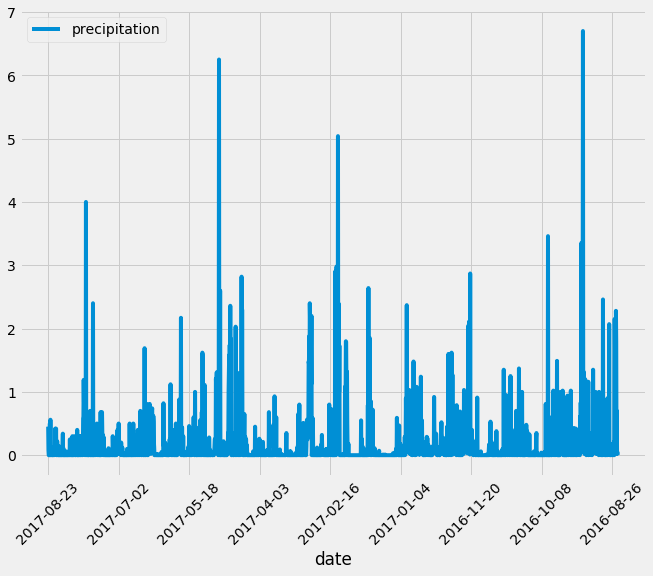

In [52]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_date = '2016-08-23'

# Perform a query to retrieve the data and precipitation scores

x= session.query(measurements.date,measurements.prcp).filter(measurements.date >= last_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(x)
df = df.rename(columns={0:'date',1:'precipitation'})
df = df.set_index('date')
df = df.dropna()
# Sort the dataframe by date
df = df.sort_values('date', ascending=False)

# Use Pandas Plotting with Matplotlib to plot the data

df.plot(figsize=(10,8),rot=45)
plt.savefig("Precipitation_date_plot")
plt.show()


In [97]:
x

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [53]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [55]:
# Design a query to calculate the total number stations in the dataset
y= session.query(station.station).count()
y

9

In [86]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
z = session.query(measurements.station, func.count(measurements.station)).group_by(measurements.station).order_by(func.count(measurements.station).desc()).all()
z


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [87]:
fg = session.query(measurements.tobs).all()
fg

[(65.0,),
 (63.0,),
 (74.0,),
 (76.0,),
 (73.0,),
 (70.0,),
 (64.0,),
 (68.0,),
 (73.0,),
 (64.0,),
 (61.0,),
 (66.0,),
 (65.0,),
 (68.0,),
 (64.0,),
 (72.0,),
 (66.0,),
 (66.0,),
 (69.0,),
 (67.0,),
 (67.0,),
 (71.0,),
 (67.0,),
 (76.0,),
 (68.0,),
 (72.0,),
 (70.0,),
 (67.0,),
 (66.0,),
 (67.0,),
 (69.0,),
 (67.0,),
 (67.0,),
 (64.0,),
 (69.0,),
 (73.0,),
 (73.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (71.0,),
 (61.0,),
 (69.0,),
 (63.0,),
 (64.0,),
 (65.0,),
 (67.0,),
 (68.0,),
 (65.0,),
 (76.0,),
 (75.0,),
 (66.0,),
 (70.0,),
 (72.0,),
 (73.0,),
 (70.0,),
 (71.0,),
 (72.0,),
 (72.0,),
 (69.0,),
 (70.0,),
 (73.0,),
 (72.0,),
 (73.0,),
 (70.0,),
 (71.0,),
 (68.0,),
 (70.0,),
 (72.0,),
 (69.0,),
 (68.0,),
 (74.0,),
 (72.0,),
 (72.0,),
 (73.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (74.0,),
 (74.0,),
 (74.0,),
 (71.0,),
 (72.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (73.0,),
 (73.0,),
 (71.0,),
 (71.0,),
 (68.0,),
 (70.0,),
 (71.0,),
 (74.0,),
 (71.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (75.0,),


In [88]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_min = session.query(func.min(measurements.tobs)).filter(measurements.station == 'USC00519281').first()
temp_max = session.query(func.max(measurements.tobs)).filter(measurements.station == 'USC00519281').first()
temp_avg = session.query(func.avg(measurements.tobs)).filter(measurements.station == 'USC00519281').first()

print(f'The maximum temperature was {temp_max}, the minimum temperature was {temp_min}, and the average temperature was {temp_avg}')

The maximum temperature was (85.0,), the minimum temperature was (54.0,), and the average temperature was (71.66378066378067,)


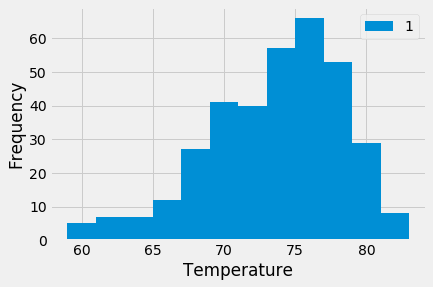

In [96]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
hist_data = session.query(measurements.date, measurements.tobs).filter(measurements.date >= last_date).filter(measurements.station == 'USC00519281').all()
hist_df = pd.DataFrame(hist_data)
hist_df.plot(kind='hist', bins=12)
plt.xlabel("Temperature")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()